In [3]:
# Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# reading pokemon_data.csv
df = pd.read_csv("pokemon_data.csv")

# print df head and tail
display(df.head(), df.tail())

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [5]:
# print df info
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


None

In [6]:
# create total stats column
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']

# print df head
display(df.head())

# display datatyp of total
display(df['Total'].dtypes)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


dtype('int64')

In [7]:
# create coloumn if pokemon is dual type
df['Dual Type'] = df['Type 2'].notnull()

# print df head
display(df.head())


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Dual Type
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,True
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,True
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,True
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,False


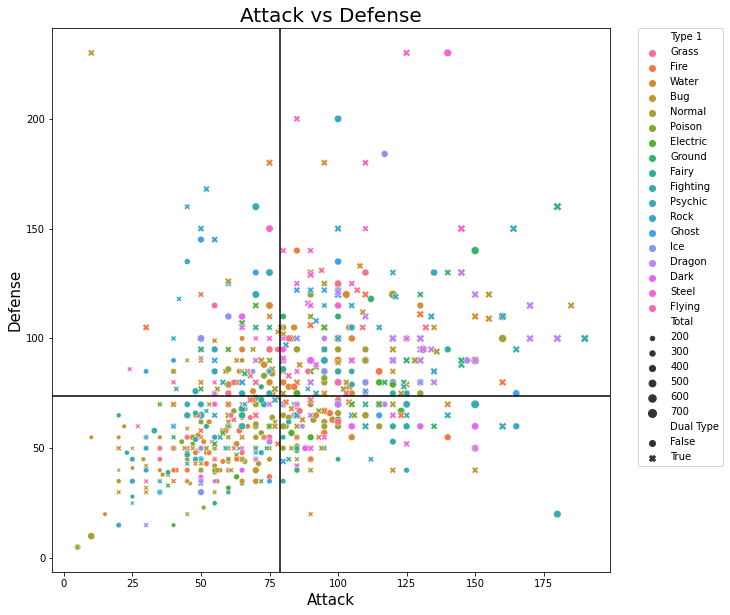

In [8]:
# create scatterplot attack vs defense, size = total stats, shape = dual type, color = type 1
sns.scatterplot(x = 'Attack', y = 'Defense', size = 'Total', hue = 'Type 1', style = 'Dual Type', data = df)

# adjust size of plot
plt.gcf().set_size_inches(10, 10)

# add labels
plt.xlabel('Attack', fontsize = 15)
plt.ylabel('Defense', fontsize = 15)
plt.title('Attack vs Defense', fontsize = 20)

# legend not on plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# add mean attack and defense lines
plt.axvline(df['Attack'].mean(), color = 'black')
plt.axhline(df['Defense'].mean(), color = 'black')

# show plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


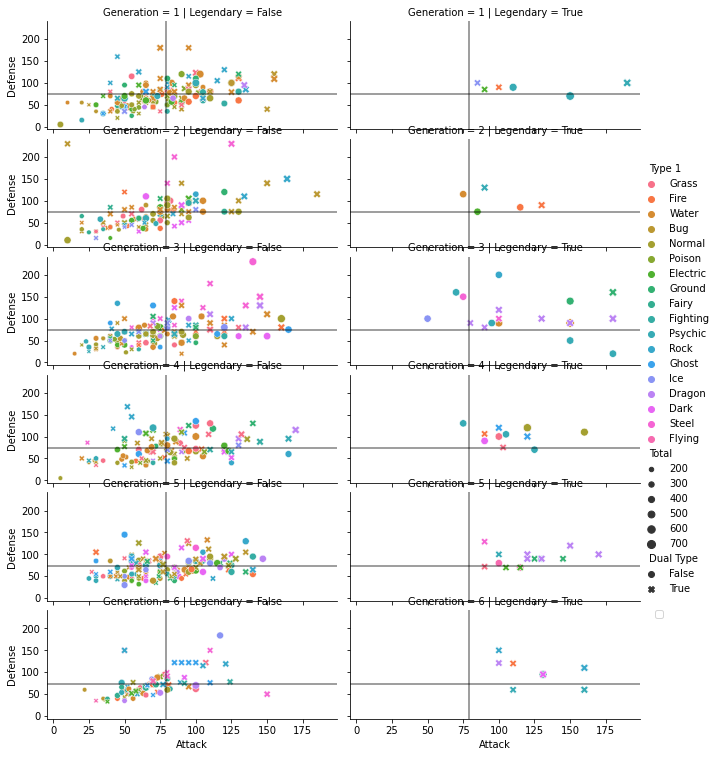

In [9]:
# create multiple scatterplots, split by legendary and generation
sns.relplot(x = 'Attack', y = 'Defense', size = 'Total', hue = 'Type 1', style = 'Dual Type', col = 'Legendary', row = 'Generation', data = df)

# adjust size of plot
plt.gcf().set_size_inches(10, 10)


# legend not on plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# add mean attack and defense thin lines in every subplot
for ax in plt.gcf().axes:
    ax.axvline(df['Attack'].mean(), color = 'black', alpha = 0.5)
    ax.axhline(df['Defense'].mean(), color = 'black', alpha = 0.5)

# label generation and legendary show once
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# show plot
plt.show()


In [10]:
# rename coloumn name type 1 to primary type
df.rename(columns = {'Type 1': 'Primary Type'}, inplace = True)

# print df head
display(df.head())


,#,Name,Primary Type,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total,Dual Type
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,True
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,True
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,True
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,True
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,False


In [11]:
# make that plot interactive
from turtle import shape
import plotly.express as px

# create interactive scatterplot
fig = px.scatter(df, x = 'Attack', y = 'Defense', 
                 size = 'Total', color = 'Primary Type',
                 hover_name = 'Name', facet_col = 'Generation', facet_row = 'Legendary')

# add legend out of plot
fig.update_layout(legend=dict(x=1, y=1))

# adjust size of plot
fig.update_layout(width = 2000, height = 2000)

# show plot
fig.show()

# export plot to dashboard html
fig.write_html("LE2_pokemon_dashboard.html")


In [12]:
# interactive scatterplot with plotly express
import plotly.express as px

# create interactive scatterplot, x = #, y = total, size = total, color = type 1, symbol = dual type, hover name = name
fig = px.scatter(df, x = '#', y = 'Total',
                    size = 'Total', color = 'Primary Type',
                    hover_name = 'Name')

# add legend out of plot
fig.update_layout(legend=dict(x=1, y=1))

# adjust size of plot
fig.update_layout(width = 2000, height = 1000)

# show plot
fig.show()

# export plot to dashboard html
fig.write_html("LE2_pokemon_total_id.html")



In [15]:
# using dash and plotly express to make a pokemon dashboard
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# create dash app
app = dash.Dash(__name__)

# create layout
app.layout = html.Div([
    html.H1('Pokemon Dashboard'),
    html.H2('Pokemon Attack vs Defense'),
    dcc.Graph(figure = px.scatter(df, x = 'Attack', y = 'Defense',
                    size = 'Total', color = 'Primary Type',
                    hover_name = 'Name')),
    html.H2('Pokemon Attack vs Defense by Generation and Legendary'),
    dcc.Graph(figure = px.scatter(df, x = 'Attack', y = 'Defense',
                    size = 'Total', color = 'Primary Type',
                    hover_name = 'Name', facet_col = 'Generation', facet_row = 'Legendary')),
    html.H2('Pokemon Total Stats by ID'),
    dcc.Graph(figure = px.scatter(df, x = '#', y = 'Total',
                    size = 'Total', color = 'Primary Type',
                    hover_name = 'Name'))
])

# run app
if __name__ == '__main__':
    app.run_server(port='5000', host='127.0.0.1', debug=True)


Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

Dash is running on http://127.0.0.1:5000/

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

c:\Users\Ben\daw\lib\site-packages\IPython\core\interactiveshell.py:3259: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [14]:
# convert this notebook to python script
!jupyter nbconvert --to script LE2_pokemon_dashboard.ipynb

[NbConvertApp] Converting notebook LE2_pokemon_dashboard.ipynb to script
[NbConvertApp] Writing 4610 bytes to LE2_pokemon_dashboard.py
